# Question 1 
## Collecting data
## Calculating return and volatility

[*********************100%%**********************]  1 of 1 completed
Annualized Average Return: 0.321682
Annualized Standard Deviation of Return: 0.286780
Annualized Average LogReturns: 0.280257
Annualized Standard Deviation of LogReturns: 0.287511


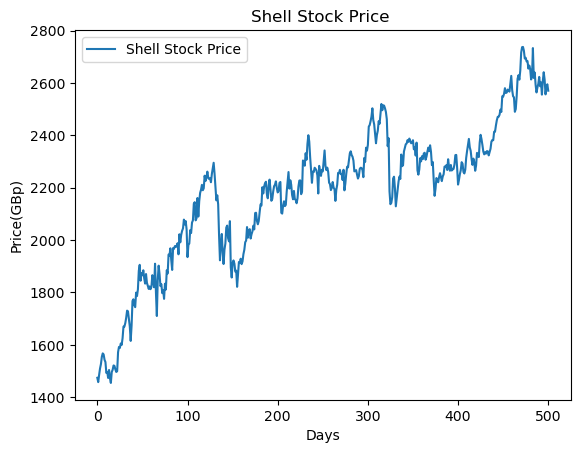

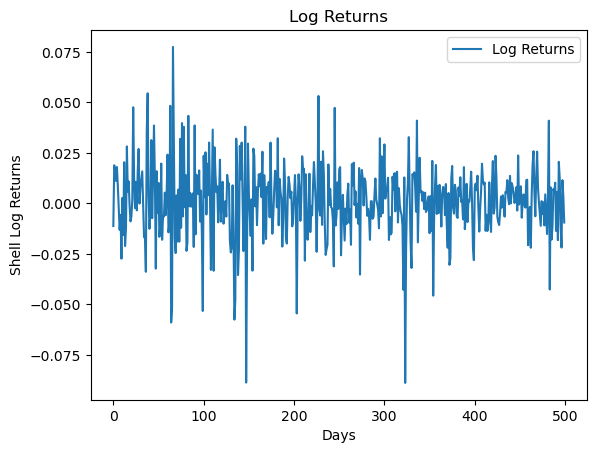

In [10]:
import yfinance as yf    #import yahoo finance library
import matplotlib.pyplot as plt
import numpy as np

# #Download historical Shell Plc daily stock price for the past two years
shell_data = yf.download("SHEL.L", start="2021-11-28", end="2023-11-28")  # Adjust symbol and date range as needed

# Use Adjusted Close prices as daily stock price for calculations
prices = shell_data['Adj Close'].tolist()



# Calculate daily returns 
returns = [(prices[i + 1] - prices[i]) / prices[i] for i in range(len(prices) - 1)]

# Calculate log returns 
logreturns = [np.log(prices[i + 1] / prices[i]) for i in range(len(prices) - 1)]

# Calculate annualized average return for both returns and log returns
avg_return = np.mean(returns) * 252  # 252 trading days in a year
avg_logreturn = np.mean(logreturns) * 252  # 252 trading days in a year

# Calculate annualized standard deviation of return for both returns and log returns
std_return = np.std(returns) * np.sqrt(252)  # 252 trading days in a year
std_logreturn = np.std(logreturns) * np.sqrt(252)  # 252 trading days in a year

print(f"Annualized Average Return: {avg_return:.6f}")
print(f"Annualized Standard Deviation of Return: {std_return:.6f}")

print(f"Annualized Average LogReturns: {avg_logreturn:.6f}")
print(f"Annualized Standard Deviation of LogReturns: {std_logreturn:.6f}")

# Plotting the movement of Shell stock prices
plt.plot(prices, label='Shell Stock Price')
plt.title('Shell Stock Price ')
plt.xlabel('Days')
plt.ylabel('Price(GBp)')
plt.legend()
plt.show()


# Plotting log Return of Shell stock prices
plt.plot(logreturns, label='Log Returns')
plt.title('Log Returns')
plt.xlabel('Days')
plt.ylabel('Shell Log Returns')
plt.legend()
plt.show()

# Question 2

# 1.Black-Scholes model


In [21]:
import math   #To calculate CDF of Normal Standard distribution in Black Scholes model

# Black Scholes model to calculate non-dividend European call option price
def Call_BS(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    
    N1 = 0.5 * (1 + math.erf(d1 / math.sqrt(2))) 
    N2 = 0.5 * (1 + math.erf(d2 / math.sqrt(2))) #The likelihood of excersing a call option
    
    call = S * N1 - K * math.exp(-r * T) * N2   #call option price
    return call
 

# User inputs
S = float(input("current stock price: "))
K = float(input("strike price: "))
T = float(input("time to maturity in years: "))
r = float(input("risk-free interest rate: "))
sigma = float(input("standard deviation of log return: "))

call_price = Call_BS(S, K, T, r, sigma)
round_call_price = round(call_price, 3)               #round the output to three demical places
print("European call option price (Black-Scholes):", round_call_price)



current stock price:  2571
strike price:  2600
time to maturity in years:  0.25
risk-free interest rate:  0.045
standard deviation of log return:  0.287


European call option price (Black-Scholes): 147.1


## 2.Binomial Tree model

In [28]:
import numpy as np

# Binomial Tree model to calculate non-dividend European call option price
def Call_BT(S, K, T, r, sigma, nodes):
    deltaT = T / nodes                       # periods between nodes
    u = np.exp(sigma * np.sqrt(deltaT))      # stock price increases by u in per node
    d = 1 / u                                # stock price decreases by d in per node
    p = (np.exp(r * deltaT) - d) / (u - d)   # probability of increase in stock price under risk-neutral valuation
    tree = np.zeros((nodes + 1, nodes + 1))  # numpy array initialized with zeros to store option prices per nodes
    stock_prices = np.zeros((nodes + 1, nodes + 1))  # array to store stock prices at each node
    option_values = np.zeros((nodes + 1, nodes + 1))  # array to store option values at each node

    # call option payoff at maturity
    for i in range(nodes + 1):
        stock_prices[i, nodes] = S * (u ** (nodes - i)) * (d ** i)
        option_values[i, nodes] = max(0, stock_prices[i, nodes] - K)
        tree[i, nodes] = option_values[i, nodes]

    # call option payoff at previous nodes
    for j in range(nodes - 1, -1, -1):
        for i in range(j + 1):
            stock_prices[i, j] = S * (u ** (j - i)) * (d ** i)
            option_values[i, j] = np.exp(-r * deltaT) * (p * tree[i, j + 1] + (1 - p) * tree[i + 1, j + 1])
            tree[i, j] = option_values[i, j]

    return tree[0, 0], stock_prices, option_values  # returns call option price, stock prices, and option values

# User inputs
S = float(input("current stock price: "))
K = float(input("strike price: "))
T = float(input("time to maturity in years: "))
r = float(input("risk-free interest rate: "))
sigma = float(input("standard deviation of log return: "))
nodes = int(input("number of steps: "))

# Calculate call option price, stock prices, and option values
call_price, stock_prices, option_values = Call_BT(S, K, T, r, sigma, nodes)

# Printing calculations for each node
print("\nStock prices at each node:")
print(stock_prices)
print("\nOption values at each node:")
print(option_values)

round_call_price = round(call_price, 3)  # round the output to three decimal places
print("\nEuropean call option price (Binomial Tree):", round_call_price)


current stock price:  2571
strike price:  2600
time to maturity in years:  0.25
risk-free interest rate:  0.045
standard deviation of log return:  0.287
number of steps:  3



Stock prices at each node:
[[2571.         2793.07933615 3034.34157061 3296.44369494]
 [   0.         2366.57831894 2571.         2793.07933615]
 [   0.            0.         2178.4103227  2366.57831894]
 [   0.            0.            0.         2005.20367151]]

Option values at each node:
[[158.96375878 269.97551981 444.07331219 696.44369494]
 [  0.          48.28306387  96.552897   193.07933615]
 [  0.           0.           0.           0.        ]
 [  0.           0.           0.           0.        ]]

European call option price (Binomial Tree): 158.964


# Question 3 (Greeks)

## 1.Delta

Delta: 0.529


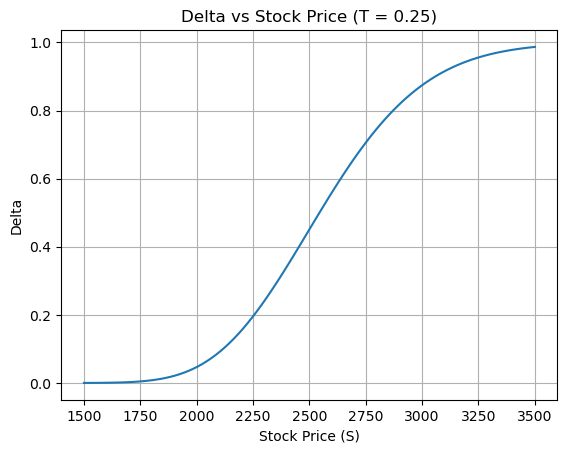

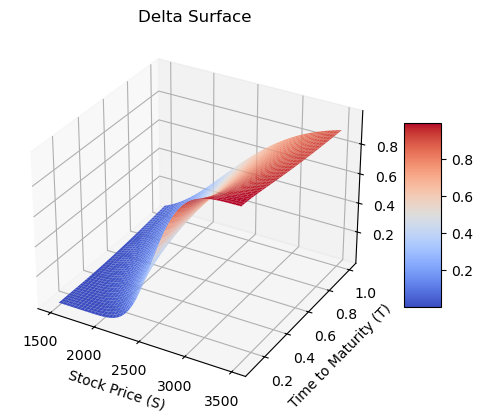

In [40]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Delta
def delta(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))    
    N1 = 0.5 * (1 + math.erf(d1 / math.sqrt(2)))  
    return N1

#  Shell option parameters (for Delta calculation)
S = 2571  #current stock price
K = 2600  #exercise price 
T = 0.25   #time to maturity
r = 0.045   #risk-free interest rate
sigma = 0.287  #volatility

#delta of Shell call option
N1 = delta(S, K, T, r, sigma)
round_N1 = round(N1, 3)  # Round the output to three decimal places
print("Delta:", round_N1)

S_values = np.linspace(1500, 3500, 100)  # Stock price range 

# Calculate Delta values for different stock prices
delta_values = np.zeros(len(S_values))
for i in range(len(S_values)):
    delta_values[i] = delta(S_values[i], K, T, r, sigma)

# Plot Delta against Stock Price
plt.plot(S_values, delta_values)
plt.xlabel('Stock Price (S)')
plt.ylabel('Delta')
plt.title('Delta vs Stock Price (T = {})'.format(T))
plt.grid(True)
plt.show()


# Define ranges for stock price (S) and time to maturity (T)
S_values = np.linspace(1500, 3500, 100)  # Stock price range 
T_values = np.linspace(0.1, 1, 50)   # Time to maturity range 

# Calculate Delta values for different combinations of S and T
delta_values = np.zeros((len(S_values), len(T_values)))
for i in range(len(S_values)):
    for j in range(len(T_values)):
        delta_values[i, j] = delta(S_values[i], K, T_values[j], r, sigma)

# Create surface plot for Delta
S, T = np.meshgrid(S_values, T_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(S, T, delta_values.T, cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Delta')
plt.title('Delta Surface')
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()


## 2.Gamma

Gamma: 0.001


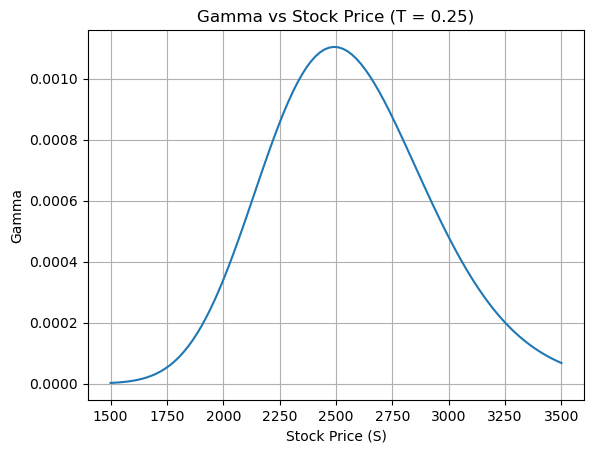

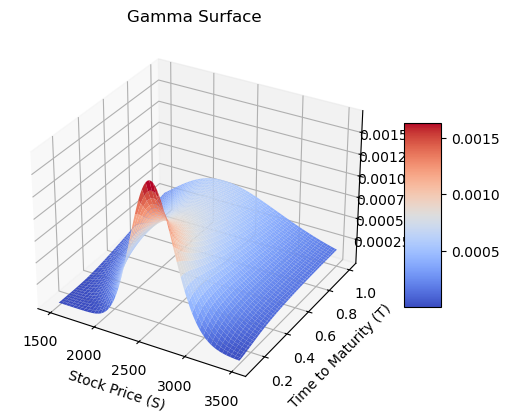

In [47]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Gamma
def gamma(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    N_prime_d1 = 1 / (math.sqrt(2 * math.pi)) * math.exp(-0.5 * d1**2)
    gamma = N_prime_d1 / (S * sigma * math.sqrt(T))
    return gamma

#  Shell option parameters (for Gamma calculation)
S = 2571  #current stock price
K = 2600  #exercise price 
T = 0.25   #time to maturity
r = 0.045   #risk-free interest rate
sigma = 0.287  #volatility

#Gamma of Shell call option
G = gamma(S, K, T, r, sigma)
round_G = round(G, 3)  # Round the output to three decimal places
print("Gamma:", round_G)

S_values = np.linspace(1500, 3500, 100)  # Stock price range 

# Calculate Gamma values for different stock prices
gamma_values = np.zeros(len(S_values))
for i in range(len(S_values)):
    gamma_values[i] = gamma(S_values[i], K, T, r, sigma)

# Plot Gamma against Stock Price
plt.plot(S_values, gamma_values)
plt.xlabel('Stock Price (S)')
plt.ylabel('Gamma')
plt.title('Gamma vs Stock Price (T = {})'.format(T))
plt.grid(True)
plt.show()


# Define ranges for stock price (S) and time to maturity (T)
S_values = np.linspace(1500, 3500, 100)  # Stock price range 
T_values = np.linspace(0.1, 1, 50)   # Time to maturity range 

# Calculate Gamma values for different combinations of S and T
gamma_values = np.zeros((len(S_values), len(T_values)))
for i in range(len(S_values)):
    for j in range(len(T_values)):
        gamma_values[i, j] = gamma(S_values[i], K, T_values[j], r, sigma)

# Create surface plot for Gamma
S, T = np.meshgrid(S_values, T_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(S, T, gamma_values.T, cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Gamma')
plt.title('Gamma Surface')
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()


## 3.Vega

Vega: 511.513


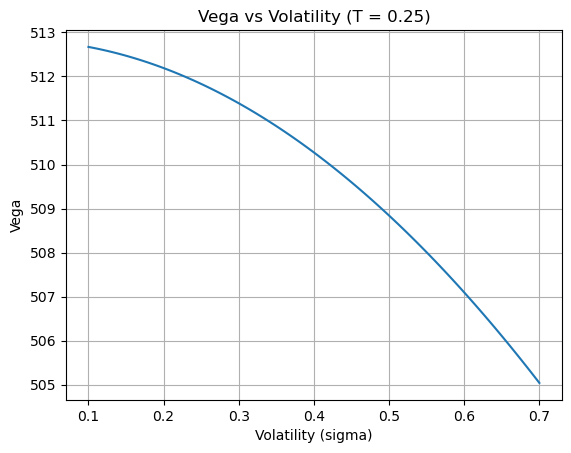

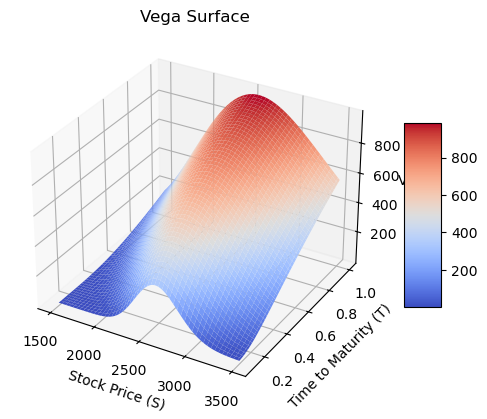

In [55]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Vega
def vega(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    N_prime_d1 = 1 / (math.sqrt(2 * math.pi)) * math.exp(-0.5 * d1**2)
    vega = N_prime_d1 * (S * math.sqrt(T))
    return vega

#  Shell option parameters (for Vega calculation)
S = 2571  #current stock price
K = 2600  #exercise price 
T = 0.25   #time to maturity
r = 0.045   #risk-free interest rate
sigma = 0.287  #volatility

#Vega of Shell call option
G = vega(S, K, T, r, sigma)
round_G = round(G, 3)  # Round the output to three decimal places
print("Vega:", round_G)

Sigma_values = np.linspace(0.1, 0.7, 100)  # Stock price range 

# Calculate Vega values for different stock prices
vega_values = np.zeros(len(Sigma_values))
for i in range(len(Sigma_values)):
    vega_values[i] = vega(S, K, T, r, Sigma_values[i])

# Plot Vega against Volatility
plt.plot(Sigma_values, vega_values)
plt.xlabel('Volatility (sigma)')
plt.ylabel('Vega')
plt.title('Vega vs Volatility (T = {})'.format(T))
plt.grid(True)
plt.show()


# Define ranges for stock price (S) and time to maturity (T)
S_values = np.linspace(1500, 3500, 100)  # Stock price range 
T_values = np.linspace(0.1, 1, 50)   # Time to maturity range 

# Calculate Vega values for different combinations of S and T
vega_values = np.zeros((len(S_values), len(T_values)))
for i in range(len(S_values)):
    for j in range(len(T_values)):
        vega_values[i, j] = vega(S_values[i], K, T_values[j], r, sigma)

# Create surface plot for Vega
S, T = np.meshgrid(S_values, T_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(S, T, vega_values.T, cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Vega')
plt.title('Vega Surface')
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()


# 4.Rho

Rho: 303.042


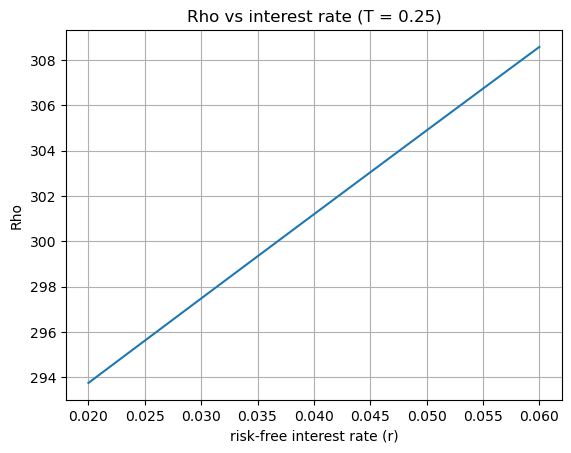

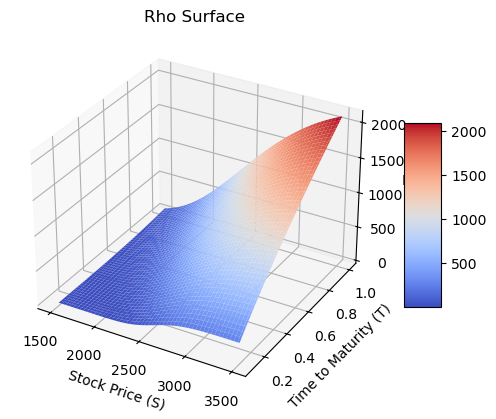

In [61]:
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Rho
def rho(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    N_d2 = 0.5 * (1 + math.erf(d2 / math.sqrt(2)))  # Standard normal CDF approximation
    rho = K * T * math.exp(-r * T) * N_d2
    return rho

#  Shell option parameters (for Rho calculation)
S = 2571  #current stock price
K = 2600  #exercise price 
T = 0.25   #time to maturity
r = 0.045   #risk-free interest rate
sigma = 0.287  #volatility

#Rho of Shell call option
G = rho(S, K, T, r, sigma)
round_G = round(G, 3)  # Round the output to three decimal places
print("Rho:", round_G)

R_values = np.linspace(0.02, 0.06, 50)  # interest rate range 

# Calculate Rho values for different interest rates
rho_values = np.zeros(len(R_values))
for i in range(len(R_values)):
    rho_values[i] = rho(S, K, T, R_values[i], sigma)

# Plot Rho against Interest rate
plt.plot(R_values, rho_values)
plt.xlabel('risk-free interest rate (r)')
plt.ylabel('Rho')
plt.title('Rho vs interest rate (T = {})'.format(T))
plt.grid(True)
plt.show()


# Define ranges for stock price (S) and time to maturity (T)
S_values = np.linspace(1500, 3500, 100)  # Stock price range 
T_values = np.linspace(0.1, 1, 50)   # Time to maturity range 

# Calculate Rho values for different combinations of S and T
rho_values = np.zeros((len(S_values), len(T_values)))
for i in range(len(S_values)):
    for j in range(len(T_values)):
        rho_values[i, j] = rho(S_values[i], K, T_values[j], r, sigma)

# Create surface plot for Rho
S, T = np.meshgrid(S_values, T_values)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surface = ax.plot_surface(S, T, rho_values.T, cmap='coolwarm')

# Set labels and title
ax.set_xlabel('Stock Price (S)')
ax.set_ylabel('Time to Maturity (T)')
ax.set_zlabel('Rho')
plt.title('Rho Surface')
fig.colorbar(surface, shrink=0.5, aspect=5)
plt.show()
